In [ ]:
# !pip install insightface --user

In [1]:
import cv2
import os
import random
import insightface
import numpy as np
from pathlib import Path
from contextlib import redirect_stdout
from display_notebook import display_images_grid_html

with open(os.devnull, 'w') as fnull: # 標準出力を一時的に捨てる
    with redirect_stdout(fnull):
        app = insightface.app.FaceAnalysis()
        app.prepare(ctx_id=-1, det_size=(640, 640))  # ctx_id=-1：CPUで実行（GPUを使用する場合はctx_id=0に変更）


c:\Users\kenta\miniforge3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\kenta\miniforge3\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:115: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


sample_face\endo_sakura\4.jpg
sample_face\endo_sakura\5.webp


img1,img2

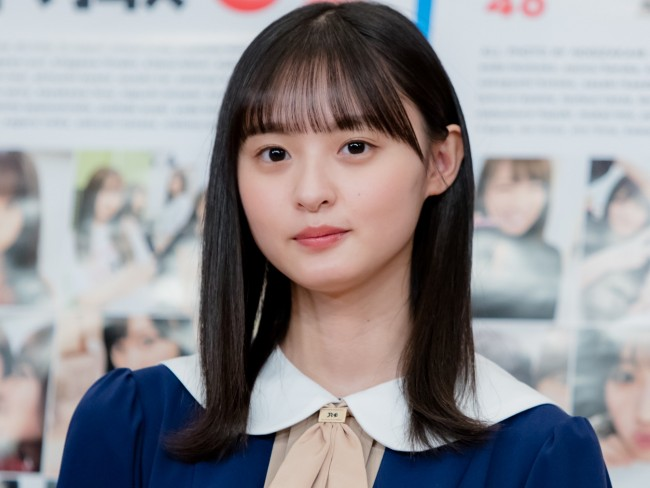
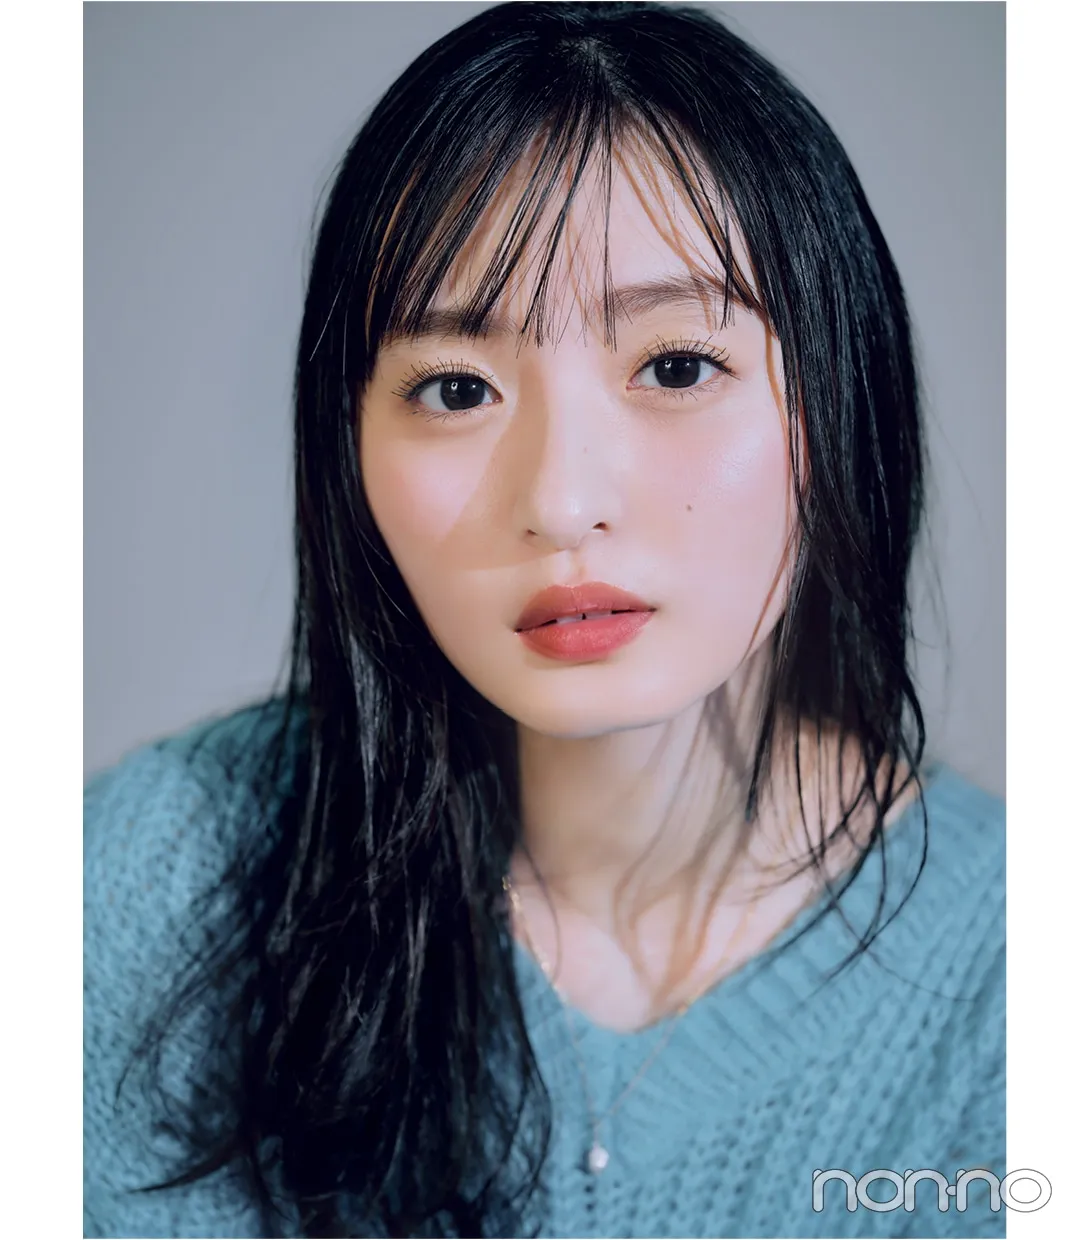

C:\Users\kenta\AppData\Roaming\Python\Python312\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


顔の類似度: 0.5596
同一人物である可能性が高いです。(正解)


face1,face2

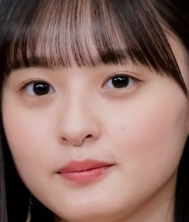
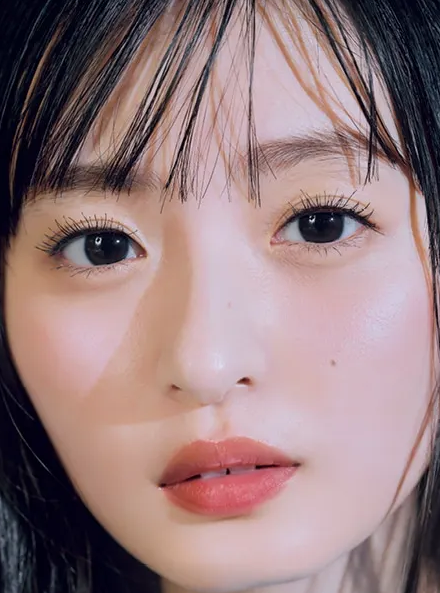

In [2]:
img1_path = random.choice(list(Path("./sample_face/").glob("**/*.*")))
img2_path = random.choice(list(Path("./sample_face/").glob("**/*.*")))

print(img1_path)
print(img2_path)
img1 = cv2.imread(str(img1_path))[:,:,::-1].copy()
img2 = cv2.imread(str(img2_path))[:,:,::-1].copy()

display_images_grid_html(images=[img1, img2], labels=["img1", "img2"])


faces1 = app.get(img1)
assert len(faces1) > 0, "face1.jpg に顔が検出されませんでした。"
face1 = faces1[0]  # 複数検出された場合は1番目の顔を使用

faces2 = app.get(img2)
assert len(faces2) > 0, "face2.jpg に顔が検出されませんでした。"
face2 = faces2[0]

embedding1 = face1.embedding
embedding2 = face2.embedding

similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))
print(f"顔の類似度: {similarity:.4f}")

ans = img1_path.parent.name == img2_path.parent.name
if similarity > 0.5:
    print(f"同一人物である可能性が高いです。({'正解' if ans else '不正解'})")
else:
    print(f"異なる人物である可能性が高いです. ({'正解' if not ans else '不正解'})")

# 顔領域をそれぞれクロップした画像を作成する
face1_bbox = face1.bbox.astype(int)
face2_bbox = face2.bbox.astype(int)

face1_cropped = img1[face1_bbox[1]:face1_bbox[3], face1_bbox[0]:face1_bbox[2]]
face2_cropped = img2[face2_bbox[1]:face2_bbox[3], face2_bbox[0]:face2_bbox[2]]

display_images_grid_html(images=[face1_cropped, face2_cropped], labels=["face1", "face2"])
